Optimal alpha: 0.001
Optimal x* for this alpha: [[-0.18081791  0.01212588]
 [-0.18035463  0.01210729]
 [-0.18037313  0.01351472]
 [-0.18106938  0.0123935 ]]


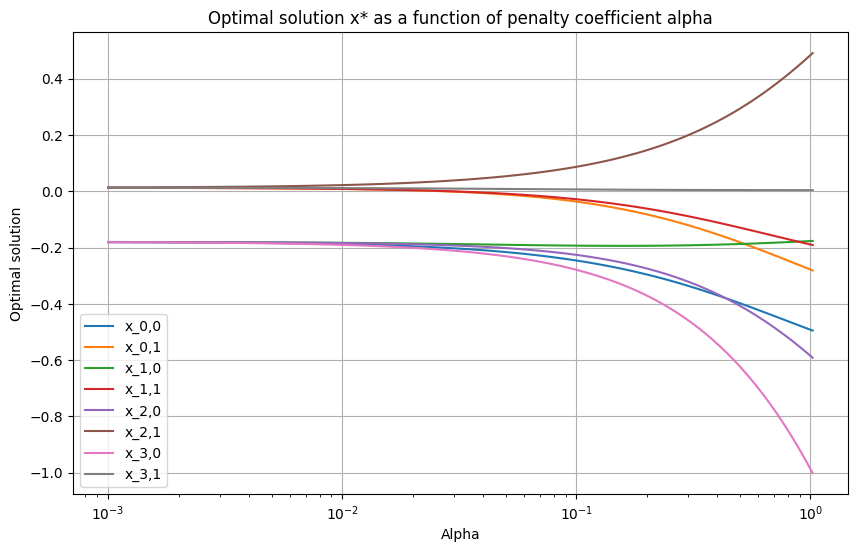

In [23]:
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import inv
import matplotlib.pyplot as plt

# Define the rotation matrix L(theta)
def L(theta):
    L_base = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return L_base

# Define the diagonal matrix D(gamma)
def D(gamma):
    D_base = np.diag([gamma, 1/gamma])
    return D_base

# Define the total cost function with penalty
def cost_function(x, alpha):
    x = np.array(x).reshape(n, p)  # Reshape x to be n x p
    # Reconstruct the vector x_i and compute F(x)
    F_x = 0
    for i in range(n):
        x_i = x[i].reshape(-1, 1)  # Convert x_i to column vector (2x1)
        F_x += x_i.T @ A_matrices[i] @ x_i + b_vectors[i].T @ x_i
    # Compute the penalty term
    penalty_term = 0.5 * np.linalg.norm(V @ x.flatten()) ** 2
    cost = alpha * F_x + penalty_term
    return cost.flatten()[0]

# Adjacency list for the graph (undirected)
adj_list = {
    0: [1, 2],  # Neighbors of node 0
    1: [0, 3],  # Neighbors of node 1
    2: [0, 3],  # Neighbors of node 2
    3: [1, 2]   # Neighbors of node 3
}
# Number of nodes
n = 4
# Dimension of x_i
p = 2  
# Initialize the weight matrix W
W = np.zeros((n, n))
for i in range(n):
    neighbors = adj_list[i]
    weight = 1 / len(neighbors)
    for j in neighbors:
        W[i, j] = weight
# Define edges for incidence matrix
edges = [(0, 1), (1, 3), (3, 2), (2, 0)]
m = len(edges)
# Compute the incidence matrix B
B = np.zeros((m, n))
for idx, (i, j) in enumerate(edges):
    weight = np.sqrt(W[i, j])
    B[idx, i] = weight
    B[idx, j] = -weight

# Define V as B ⊗ I, where I is a 2x2 identity matrix
I_2 = np.eye(p)  # 2x2 identity matrix
V = np.kron(B, I_2)  # Kronecker product of B and I_2
# Define the parameters for each node
i_values = np.arange(1, 5)  # This creates an array [1, 2, 3, 4]
# Compute θ_i = i * π / 4
theta_values = i_values * (np.pi / 4)
# Compute γ_i = 1/2^i
gamma_values = 1/(2**i_values)
# Calculate A_i and b_i for each node
A_matrices = [L(theta_values[i]).dot(D(gamma_values[i])).dot(inv(L(theta_values[i]))) for i in range(4)]
b_vectors = [L(np.pi/8)**i @ np.array([[1], [0]]) for i in i_values]  # Adjusted size to 2x1

# Define the penalty coefficient
alpha_values = np.logspace(-3, 0.01, num=100)
# Optimize the function for different alpha values
optimal_solutions = []
costs = []
for alpha in alpha_values:
    # Reshape the initial guess as a flat vector of length n * p
    result = minimize(lambda x: cost_function(x, alpha), np.zeros((n * p,)), method='BFGS')
    optimal_solutions.append(result.x.reshape(n, p))  # Reshape the result back to n x p
    costs.append(result.fun)

# Convert to a numpy array for easier plotting
optimal_solutions = np.array(optimal_solutions)
costs = np.array(np.abs(costs))

# Find the index of the minimum cost
min_cost_index = np.argmin(costs)
optimal_alpha = alpha_values[min_cost_index]
optimal_x_star = optimal_solutions[min_cost_index]
# Print results
print(f"Optimal alpha: {optimal_alpha}")
print(f"Optimal x* for this alpha: {optimal_x_star}")

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(n):
    for j in range(p):
        plt.plot(alpha_values, optimal_solutions[:, i, j], label=f'x_{i},{j}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Optimal solution')
plt.title('Optimal solution x* as a function of penalty coefficient alpha')
plt.legend()
plt.grid(True)
plt.show()